# Questions answered at the end

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',35)
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
# Loading data

data = pd.read_csv('Churn.csv')
print("Shape of Data",data.shape)
data.head()

Shape of Data (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# Data Statistics

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Variable Identification

In [5]:
# Categorical Columns

def cat_cols(dataframe):
    return list(dataframe.select_dtypes(include='object').columns)

categorical_columns = cat_cols(data)

In [6]:
# Numerical Columns

def num_cols(dataframe):
    return list(dataframe.select_dtypes(include='number').columns)

numerical_columns = num_cols(data)

In [7]:
print("Categorical Columns :\n",categorical_columns)
print("\nNumerical Columns :\n",numerical_columns)

Categorical Columns :
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Numerical Columns :
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


# Univariate Analysis

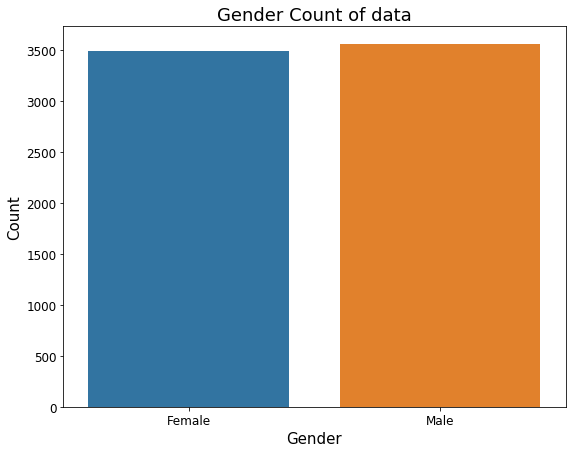

In [8]:
#  Gender

plt.figure(figsize=[9,7])
sns.countplot(data.gender)
plt.title("Gender Count of data",fontsize=18)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

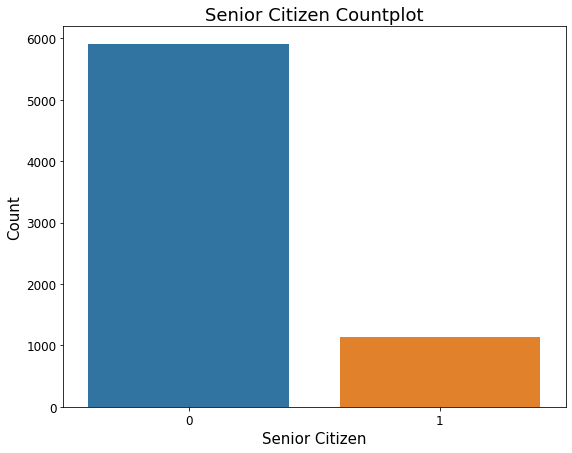

In [9]:
# Senior citizen

plt.figure(figsize=[9,7])
sns.countplot(data.SeniorCitizen)
plt.title("Senior Citizen Countplot",fontsize=18)
plt.xlabel("Senior Citizen",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

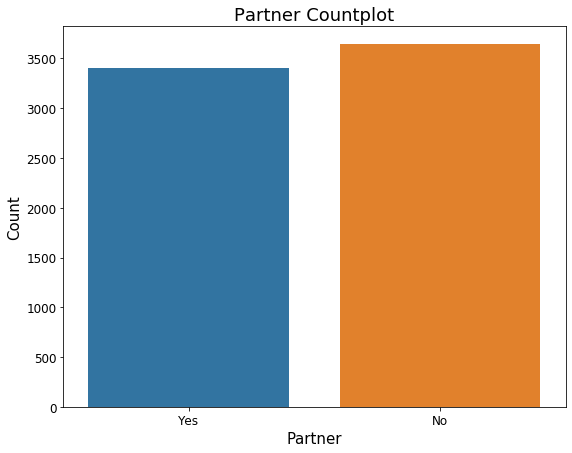

In [10]:
# Partner

plt.figure(figsize=[9,7])
sns.countplot(data.Partner)
plt.title("Partner Countplot",fontsize=18)
plt.xlabel("Partner",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

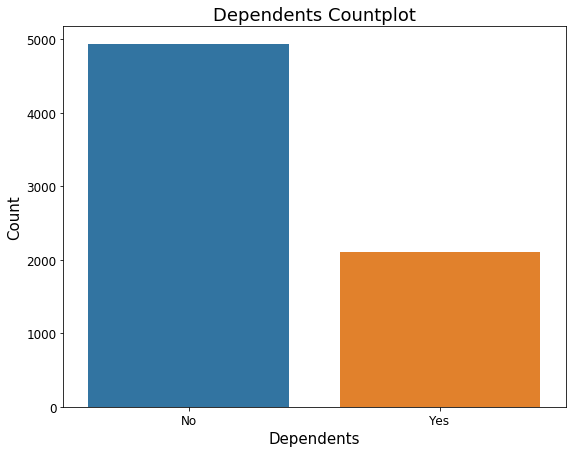

In [11]:
# Dependents

plt.figure(figsize=[9,7])
sns.countplot(data.Dependents)
plt.title("Dependents Countplot",fontsize=18)
plt.xlabel("Dependents",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

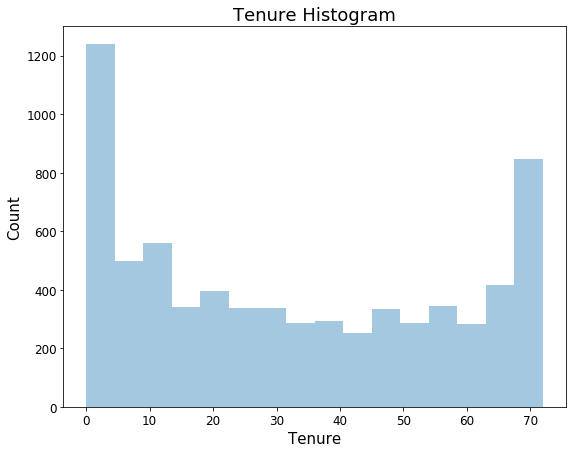

In [12]:
# Tenure

plt.figure(figsize=[9,7])
sns.distplot(data.tenure,kde=False)
plt.title("Tenure Histogram",fontsize=18)
plt.xlabel("Tenure",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

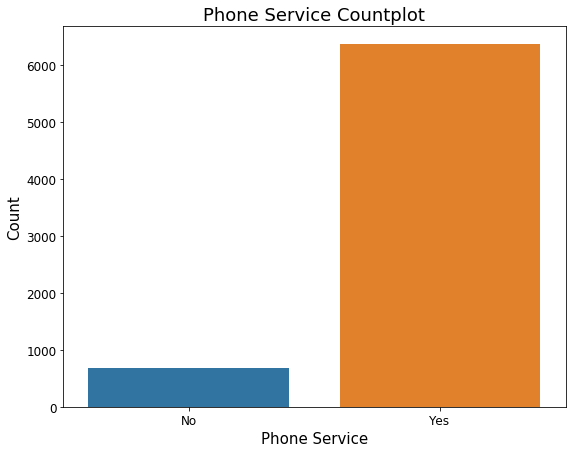

In [13]:
# Phone Service

plt.figure(figsize=[9,7])
sns.countplot(data.PhoneService)
plt.title("Phone Service Countplot",fontsize=18)
plt.xlabel("Phone Service",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

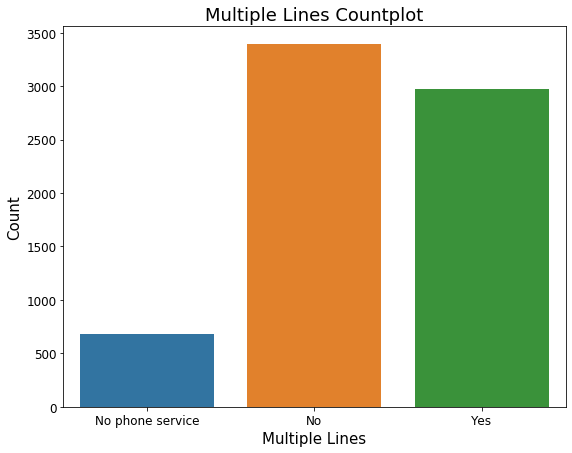

In [14]:
# Multiple lines

plt.figure(figsize=[9,7])
sns.countplot(data.MultipleLines)
plt.title("Multiple Lines Countplot",fontsize=18)
plt.xlabel("Multiple Lines",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

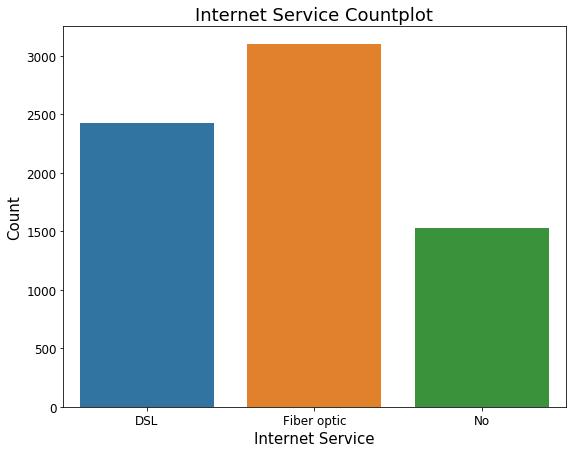

In [15]:
# Internet Service

plt.figure(figsize=[9,7])
sns.countplot(data.InternetService)
plt.title("Internet Service Countplot",fontsize=18)
plt.xlabel("Internet Service",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

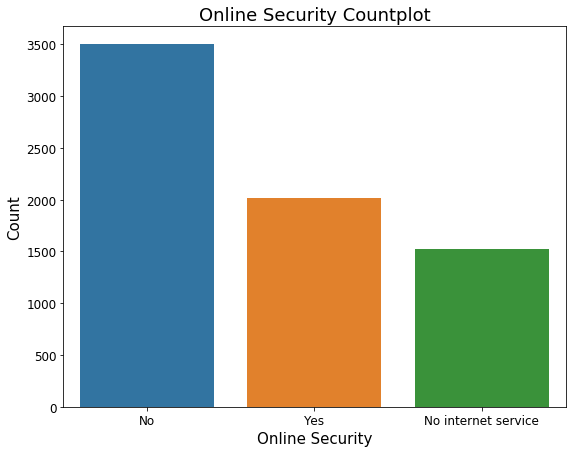

In [16]:
# Online Security

plt.figure(figsize=[9,7])
sns.countplot(data.OnlineSecurity)
plt.title("Online Security Countplot",fontsize=18)
plt.xlabel("Online Security",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

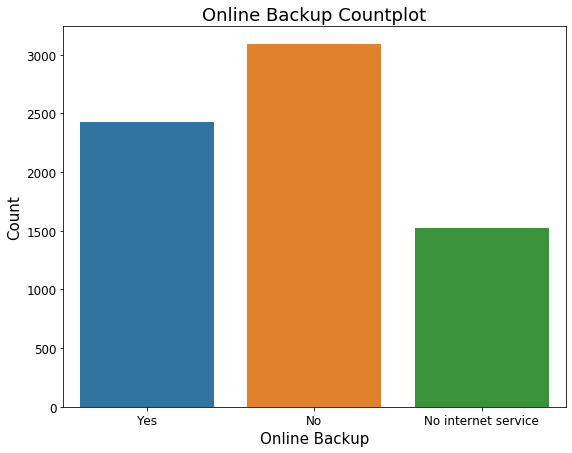

In [17]:
# Online Backup

plt.figure(figsize=[9,7])
sns.countplot(data.OnlineBackup)
plt.title("Online Backup Countplot",fontsize=18)
plt.xlabel("Online Backup",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

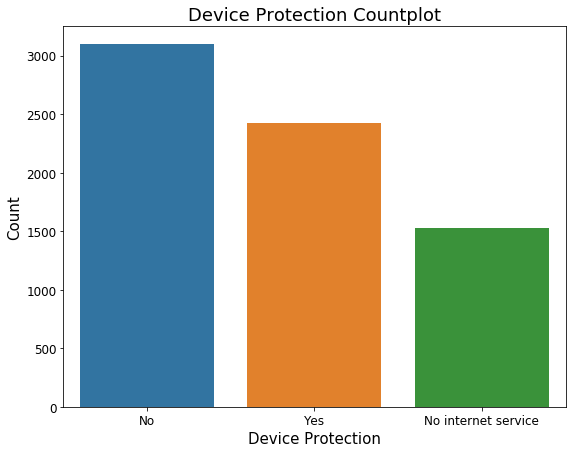

In [18]:
# Device Protection

plt.figure(figsize=[9,7])
sns.countplot(data.DeviceProtection)
plt.title("Device Protection Countplot",fontsize=18)
plt.xlabel("Device Protection",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

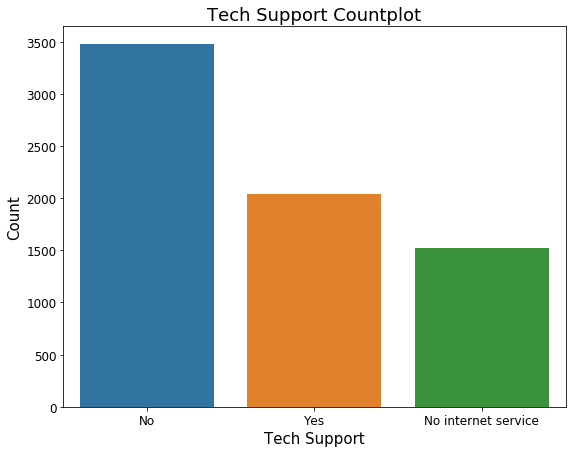

In [19]:
# Tech Support

plt.figure(figsize=[9,7])
sns.countplot(data.TechSupport)
plt.title("Tech Support Countplot",fontsize=18)
plt.xlabel("Tech Support",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

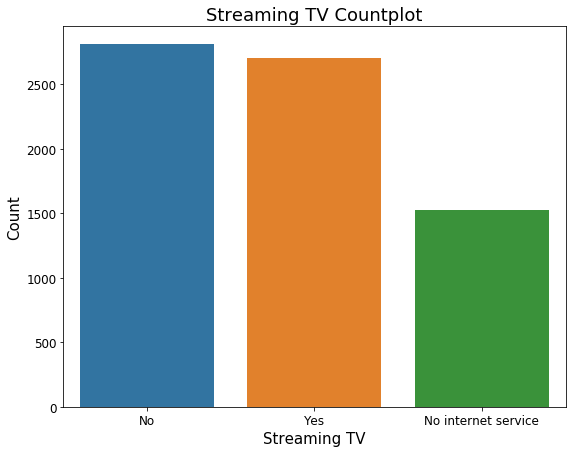

In [20]:
# Streaming TV

plt.figure(figsize=[9,7])
sns.countplot(data.StreamingTV)
plt.title("Streaming TV Countplot",fontsize=18)
plt.xlabel("Streaming TV",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

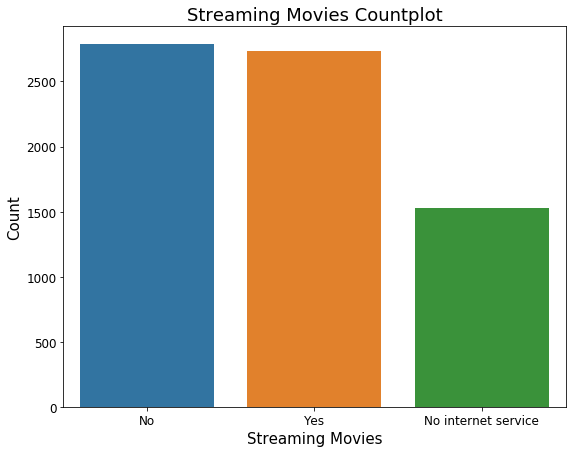

In [21]:
# Streaming Movies

plt.figure(figsize=[9,7])
sns.countplot(data.StreamingMovies)
plt.title("Streaming Movies Countplot",fontsize=18)
plt.xlabel("Streaming Movies",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

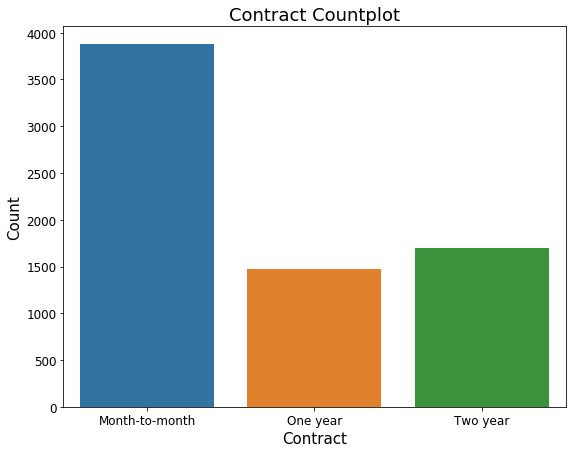

In [22]:
# Contract

plt.figure(figsize=[9,7])
sns.countplot(data.Contract)
plt.title("Contract Countplot",fontsize=18)
plt.xlabel("Contract",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

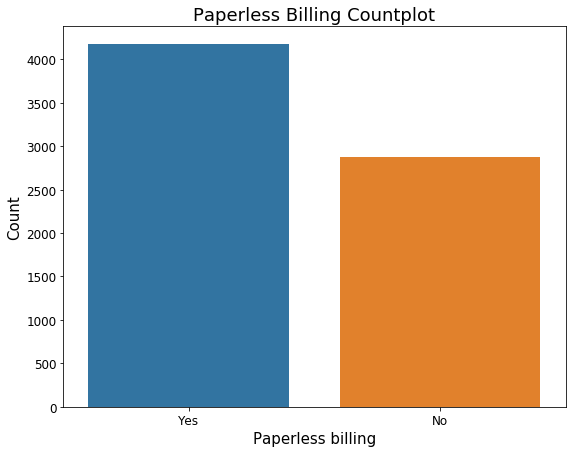

In [23]:
# Paperless Billing

plt.figure(figsize=[9,7])
sns.countplot(data.PaperlessBilling)
plt.title("Paperless Billing Countplot",fontsize=18)
plt.xlabel("Paperless billing",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

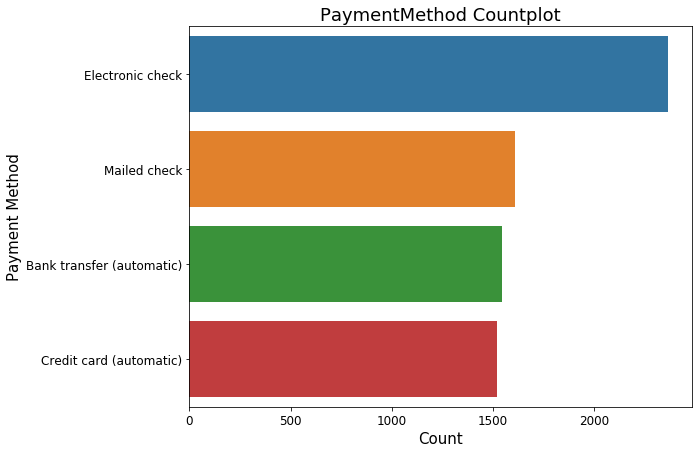

In [24]:
# Payment Method

plt.figure(figsize=[9,7])
sns.countplot(y=data.PaymentMethod)
plt.title("PaymentMethod Countplot",fontsize=18)
plt.ylabel("Payment Method",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

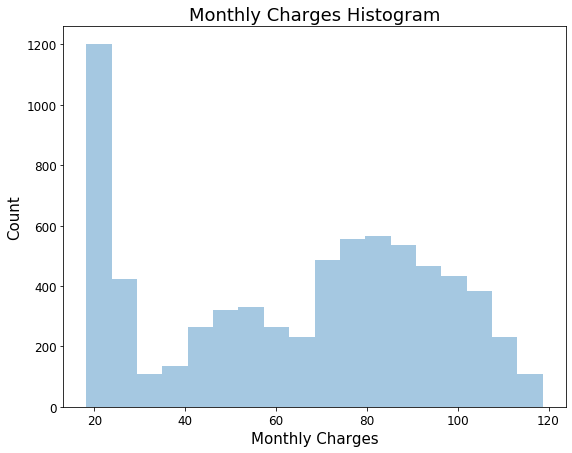

In [25]:
# Monthly Charges

plt.figure(figsize=[9,7])
sns.distplot(data.MonthlyCharges,kde=False)
plt.title("Monthly Charges Histogram",fontsize=18)
plt.xlabel("Monthly Charges",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [26]:
# Replacing Blank values with NaN temporarily

data.TotalCharges = pd.to_numeric(data.TotalCharges.replace(' ',np.NaN))

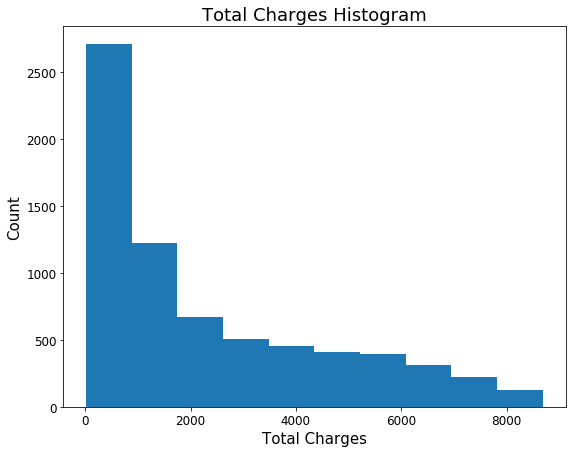

In [27]:
# Total Charges

plt.figure(figsize=[9,7])
plt.hist(data.TotalCharges)
plt.title("Total Charges Histogram",fontsize=18)
plt.xlabel("Total Charges",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [28]:
# Converting churn values into binary 0,1

churn_mapper = {"No":0,"Yes":1}
data.Churn = data.Churn.map(churn_mapper)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


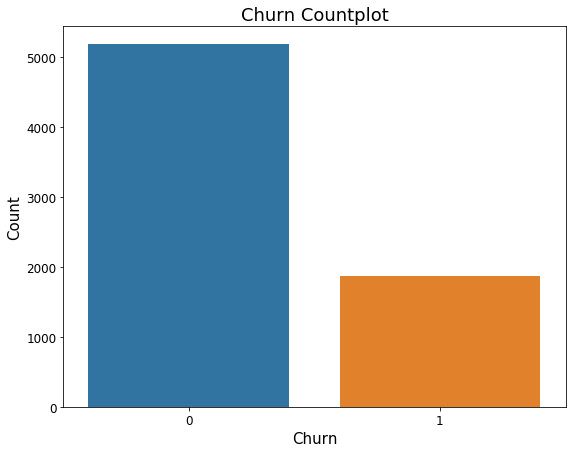

In [29]:
# Churn

plt.figure(figsize=[9,7])
sns.countplot(data.Churn)
plt.title("Churn Countplot",fontsize=18)
plt.xlabel("Churn",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Bivariate Analysis

In [30]:
# Correlation

data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


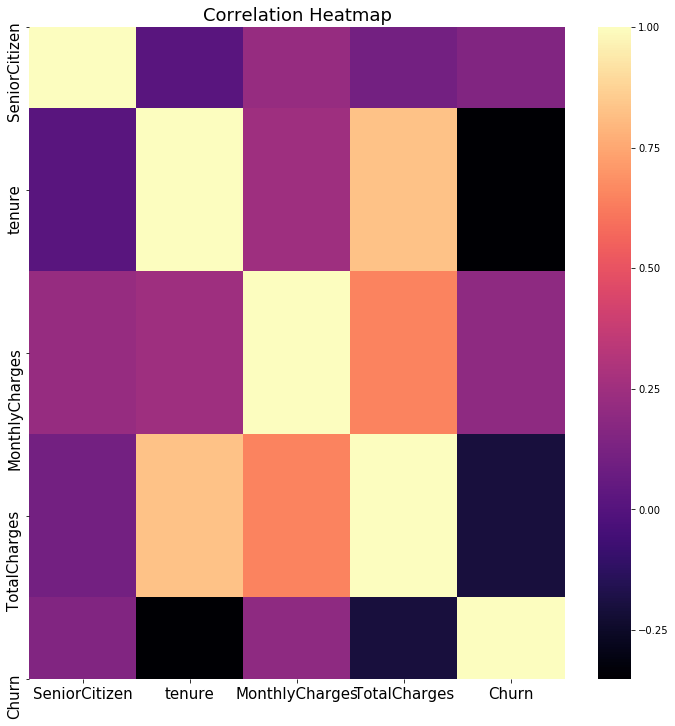

In [31]:
# Correlation Heatmap

plt.figure(figsize=[12,12])
sns.heatmap(data.corr(),cmap='magma')
plt.title("Correlation Heatmap",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

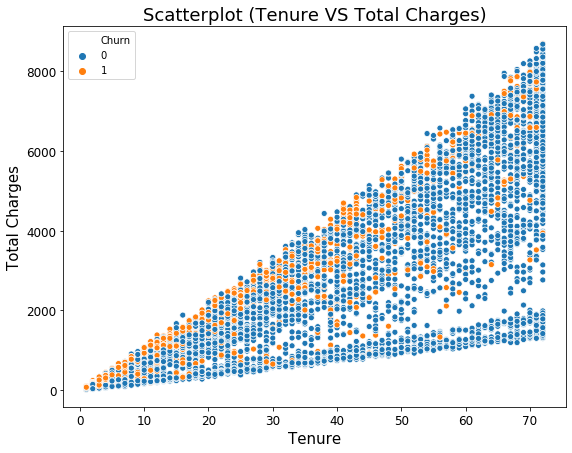

In [32]:
# Scatterplot

plt.figure(figsize=[9,7])
sns.scatterplot(data.tenure,data.TotalCharges,hue=data.Churn,)
plt.title("Scatterplot (Tenure VS Total Charges)",fontsize=18)
plt.xlabel("Tenure",fontsize=15)
plt.ylabel("Total Charges",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

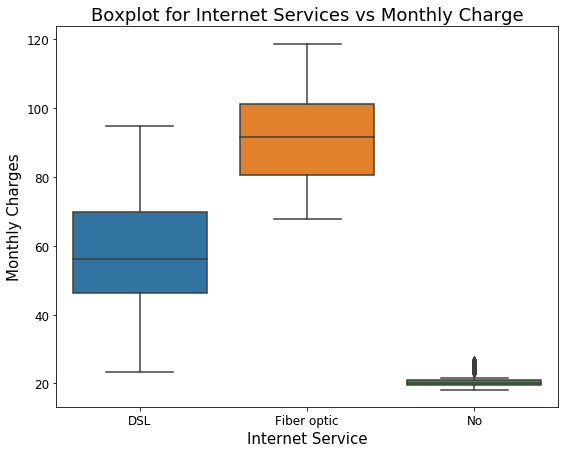

In [33]:
# Boxplot for Type of Internet services vs Monthly Charge

plt.figure(figsize=[9,7])
sns.boxplot(data.InternetService,data.MonthlyCharges)
plt.title("Boxplot for Internet Services vs Monthly Charge",fontsize=18)
plt.xlabel("Internet Service",fontsize=15)
plt.ylabel("Monthly Charges",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Missing Values 

In [34]:
# Missing Values

def missing_values(dataframe):
    counts = dataframe.isnull().sum()
    percent = dataframe.isnull().sum()/dataframe.shape[0]*100
    return pd.DataFrame({"Count":counts,"Percntage":percent},index=dataframe.isnull().sum().index)

missing_values(data)

,Count,Percntage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000
OnlineSecurity,0,0.000000


# Outlier Detection

In [35]:
# Function to detect outliers in every feature

def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)


,Feature,Number of Outliers
0,SeniorCitizen,1142
1,tenure,0
2,MonthlyCharges,0
3,TotalCharges,0
4,Churn,0


# Data Preprocessing

In [36]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [37]:
# Encoding categorical data with dummies

cols_to_encode = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                  'PaperlessBilling','PaymentMethod']

data = pd.get_dummies(data,columns=cols_to_encode,drop_first=True)
print("Shape of Encoded data",data.shape)
data.head()

Shape of Encoded data (7043, 32)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [38]:
# Dropping columns unwanted for model building
# customerID contains unique values not needed for the model
# Total Charges is highly correlated with tenure so keeping tenure for the model

data = data.drop(columns=['customerID','TotalCharges'])
data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [39]:
# Splitting data into features and target

X = data.drop("Churn",axis=1)
y = data.Churn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [40]:
# Scaling the data

minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

# Basic Models

In [41]:
# Logistic Regression

logistic = LogisticRegression()
logistic.fit(X_train_scaled,y_train)
y_pred = logistic.predict(X_test_scaled)

print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report :\n",classification_report(y_test,y_pred))

Accuracy Score : 0.8034066713981547

Confusion Matrix :
 [[925 110]
 [167 207]]

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [42]:
# Regularization with logistic Regression

c_values = [10,1,0.1,0.01,0.001,0.0001]

for i in c_values:
    logistic = LogisticRegression(C=i)
    logistic.fit(X_train_scaled,y_train)
    y_pred = logistic.predict(X_test_scaled)
    print("Accuracy with C = {0} is : {1}".format(i,accuracy_score(y_test,y_pred)))

Accuracy with C = 10 is : 0.8034066713981547
Accuracy with C = 1 is : 0.8034066713981547
Accuracy with C = 0.1 is : 0.8034066713981547
Accuracy with C = 0.01 is : 0.7885024840312278
Accuracy with C = 0.001 is : 0.7345635202271115
Accuracy with C = 0.0001 is : 0.7345635202271115


In [43]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

print("Accuracy Score :",accuracy_score(y_test,dt_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,dt_pred))
print("\nClassification Report :\n",classification_report(y_test,dt_pred))

Accuracy Score : 0.7267565649396736

Confusion Matrix :
 [[842 193]
 [192 182]]

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [44]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print("Accuracy Score :",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report :\n",classification_report(y_test,rf_pred))

Accuracy Score : 0.7806955287437899

Confusion Matrix :
 [[933 102]
 [207 167]]

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



# Feature Selection

In [45]:
# Target Correlation w.r.t. features

churn_corr = data.corr()['Churn'].sort_values(ascending=False).drop("Churn")
print("Churn Correaltion w.r.t. features :\n\n",churn_corr)

Churn Correaltion w.r.t. features :

 InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226
Contract_One

In [46]:
selected_features = churn_corr[(churn_corr > 0.1) | (churn_corr < -0.1)].index.tolist()

In [47]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train[selected_features],y_train)
dt_pred = dt.predict(X_test[selected_features])

print("Accuracy Score :",accuracy_score(y_test,dt_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,dt_pred))
print("\nClassification Report :\n",classification_report(y_test,dt_pred))

Accuracy Score : 0.7246273953158269

Confusion Matrix :
 [[842 193]
 [195 179]]

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.48      0.48      0.48       374

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409



In [48]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train[selected_features],y_train)
rf_pred = rf.predict(X_test[selected_features])

print("Accuracy Score :",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report :\n",classification_report(y_test,rf_pred))

Accuracy Score : 0.7885024840312278

Confusion Matrix :
 [[932 103]
 [195 179]]

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [49]:
selected_features2 = churn_corr[(churn_corr>0.2) |(churn_corr<-0.2)].index.tolist()

In [50]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train[selected_features2],y_train)
rf_pred = rf.predict(X_test[selected_features2])

print("Accuracy Score :",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report :\n",classification_report(y_test,rf_pred))

Accuracy Score : 0.7927608232789212

Confusion Matrix :
 [[906 129]
 [163 211]]

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [51]:
selected_features3 = churn_corr[(churn_corr>0.3) | (churn_corr<-0.3)].index.tolist()

In [52]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train[selected_features3],y_train)
rf_pred = rf.predict(X_test[selected_features3])

print("Accuracy Score :",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report :\n",classification_report(y_test,rf_pred))

Accuracy Score : 0.7920511000709723

Confusion Matrix :
 [[923 112]
 [181 193]]

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



# Models after Feature Selection

In [53]:
# Feature Selection Data

X_2 = data[selected_features]
y_2 = data.Churn

X_train2,X_test2,y_train2,y_test2 = train_test_split(X_2,y_2,test_size=0.2,stratify=y,random_state=0)

In [54]:
# Scaling the data

minmax = MinMaxScaler()

X_train_scaled2 = minmax.fit_transform(X_train2)
X_test_scaled2 = minmax.transform(X_test2)

In [55]:
# Logistic Regression

logistic = LogisticRegression()
logistic.fit(X_train_scaled2,y_train2)
y_pred = logistic.predict(X_test_scaled2)

print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report :\n",classification_report(y_test,y_pred))

Accuracy Score : 0.8005677785663591

Confusion Matrix :
 [[922 113]
 [168 206]]

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [56]:
# Regularization with logistic Regression

c_values = [10,1,0.1,0.01,0.001,0.0001]

for i in c_values:
    logistic = LogisticRegression(C=i)
    logistic.fit(X_train_scaled2,y_train2)
    y_pred = logistic.predict(X_test_scaled2)
    print("Accuracy with C = {0} is : {1}".format(i,accuracy_score(y_test,y_pred)))

Accuracy with C = 10 is : 0.7998580553584103
Accuracy with C = 1 is : 0.8005677785663591
Accuracy with C = 0.1 is : 0.7970191625266146
Accuracy with C = 0.01 is : 0.7885024840312278
Accuracy with C = 0.001 is : 0.7345635202271115
Accuracy with C = 0.0001 is : 0.7345635202271115


In [57]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train2,y_train2)
dt_pred = dt.predict(X_test2)

print("Accuracy Score :",accuracy_score(y_test,dt_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,dt_pred))
print("\nClassification Report :\n",classification_report(y_test,dt_pred))

Accuracy Score : 0.7288857345635202

Confusion Matrix :
 [[842 193]
 [189 185]]

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1035
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [58]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train2,y_train2)
rf_pred = rf.predict(X_test2)

print("Accuracy Score :",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report :\n",classification_report(y_test,rf_pred))

Accuracy Score : 0.7927608232789212

Confusion Matrix :
 [[941  94]
 [198 176]]

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# Hyperparamter Tuning

In [59]:
# Hyperparamter Tuning

n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [60]:
# random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=0)

rf_optimized.fit(X_train2,y_train2)
rf_optimized.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   2.6s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   2.7s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   2.7s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.3s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.4s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, mi

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=87, bootstrap=True, total=   4.2s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   2.3s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   2.3s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   2.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=50, min_sample

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   4.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   5.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   4.8s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=   3.1s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788,

[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   2.8s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   2.6s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   4.4s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   4.1s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=89

[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.7s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   1.0s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   1.0s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.9s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=894, mi

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.3s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True, total=   2.1s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split

[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False, total=   2.2s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=   6.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=   6.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=683, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   3.4s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=577, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   4.3s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   4.6s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   4.4s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True, total=   4.9s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.9min finished


{'n_estimators': 472,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [61]:
# Random Forest 

rf = RandomForestClassifier(n_estimators=155,min_samples_split=2,min_samples_leaf=2,max_features='auto',
                            max_depth=10,bootstrap=True)

rf.fit(X_train2,y_train2)
rf_pred = rf.predict(X_test2)

print("Accuracy Score :",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report :\n",classification_report(y_test,rf_pred))

Accuracy Score : 0.801277501774308

Confusion Matrix :
 [[939  96]
 [184 190]]

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [62]:
#  Grid Search 

In [63]:
param_grid = {'n_estimators':[100,110,120,130,140,150,160,170,180,190,200],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[2],
             'max_features':['auto'],
             'max_depth':[3,5,7,9,11,13,15],
             'bootstrap':[True]}

In [64]:
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,scoring='accuracy',cv=3,verbose=2)
grid.fit(X_train2,y_train2)
grid.best_params_

Fitting 3 folds for each of 231 candidates, totalling 693 fits
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=110 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=110 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=110 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=110, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=110 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=110, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=110 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=110, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=120 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=120, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=120 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=110, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=130 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=130, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.6s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=7, max_featu

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160 
[CV]  bootstrap=True, max_depth=7, max_featu

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160, total=   0.6s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=170 
[CV]  bootstrap=True, max_depth=7, max_featu

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=170 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=170, total=   0.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=170 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=170, total=   0.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=170 
[CV]  bootstrap=True, max_depth=9, max_featu

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=170, total=   0.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=170, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=170, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=180, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=True, max_depth=9, max_featu

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=170, total=   0.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180, total=   0.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=190 
[CV]  bootstrap=True, max_depth=9, max_featu

[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   0.7s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   0.7s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190, total=   0.8s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190, total=   0.8s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, 

[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=180, total=   0.8s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=190, total=   0.9s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=190, total=   0.9s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=190, total=   0.9s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=11, 

[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=190, total=   0.9s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=190, total=   0.9s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=190 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=190, total=   0.9s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=11, 

[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190, total=   0.8s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190, total=   0.8s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, 

[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=190, total=   0.8s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, 

[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, 

[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, 

[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=110 
[CV]  bootstrap=True, max_depth=15, 

[Parallel(n_jobs=1)]: Done 693 out of 693 | elapsed:  6.6min finished


{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 130}

In [65]:
# Random Forest 

rf = RandomForestClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=2,max_features='auto',
                            max_depth=9,bootstrap=True)

rf.fit(X_train2,y_train2)
rf_pred = rf.predict(X_test2)

print("Accuracy Score :",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report :\n",classification_report(y_test,rf_pred))

Accuracy Score : 0.8005677785663591

Confusion Matrix :
 [[942  93]
 [188 186]]

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



**1. Data cleaning including missing values, outliers and multi-collinearity. Describe your predictive churn model. How did you select variables to be included in the model?**

There was only one instance of missing value in the data so i simply dropped that row.     
There wasn't any high number of outliers in the data as most of the columns are categorical columns.
For multi-collinearity, **tenure** and **Total charges** were the 2 columns which had a very high correlation of **0.825** so i dropped **Total charges** and chose **tenure** as Total charges had some blank values which weren't NaN values but it was just empty space.
For prediction Logistic Regression gave the best output of 0.80 with all features excluding customerID and Total Charges, I tried some basic feature selection with correlation and ExtraTreeRegressor but the accuracy didn't change much.
Due to time constraint of 24 hours I didn't try more feature engineering/selection ideas.

**2. Demonstrate the performance of the model.**

Logistic Regression gave the highest accuracy of 0.80 as executed above in the basic models section.

**3. What are the key factors that predict customer churn? Do these factors make sense?**

The major factor could be slightly high rates of the services as it can be seen in the scatterplot in **Bivariate Analysis** section that most churns are the higher points on the Total Charges. It does make sense as some might have found a better plan or maybe opted for a cheaper plan of the service from other providers.

**4. What offers should be made to which customers to encourage them to remain with company?**

One idea could be to give discounts to the customers on the plans if a subscription is made for a longer term maybe 6 months or 1 year which may attract more customers.

**5. Assuming these actions were implemented, how would you determine whether they had worked?**

Direct interaction/feedback from the customers may help a lot asking if they are happy with the services and if there is any room for improvement in the current available plans.